# Magic and loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

In [4]:
# replacing index

data = data.set_index('Merchant Name')

In [5]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [6]:
data.head(3)

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0


# Functions

In [7]:
# calculating total number of zeros

def max_con_zero(numbers):
  max_zeros = []
  max_temp = 0
  for i in numbers:
    if i == 0.0:
      max_temp += 1
    if i != 0.0:
      max_zeros.append(max_temp)
      max_temp = 0
  max_zeros.append(max_temp)
    
  return max(max_zeros)

In [8]:
# calculating number of zeros at the beginning

def begin_con_zero(numbers):
  beg_zeros = 0
  for i in numbers:
    if i == 0.0:
      beg_zeros += 1
    else:
      return beg_zeros

In [9]:
# calculating number of zeros at the end

def end_con_zero(numbers):
      return begin_con_zero(numbers[::-1])

# DF exploration

## DF zeros

In [10]:
data_clean = data.copy(deep =True)

In [11]:
# addintg zero count column

data['no_zero']=data_clean.eq(0).sum(axis=1)

In [12]:
# total n. zeros for each merchant

max_cons_0 = []
for i in range(len(data)):
  max_cons_0.append(max_con_zero(data_clean.iloc[i].values))
data["cons_zeros"]=max_cons_0

# beginning n. zeros for each merchant

cons_beg = []
for i in range(len(data)):
  cons_beg.append(begin_con_zero(data_clean.iloc[i].values))
data["begin_zeros"]=cons_beg

# end n. zeros for each merchant

cons_end = []
for i in range(len(data)):
  cons_end.append(end_con_zero(data_clean.iloc[i].values))

data["end_zeros"]=cons_end

data['total_transactions'] = data_clean.sum(axis='columns')
data['median'] = data_clean.median(axis='columns')
data['min'] = data_clean.min(axis='columns')
data['max'] = data_clean.max(axis='columns')

data_features = data[['no_zero','cons_zeros','begin_zeros','end_zeros','total_transactions','median','min','max']].copy(deep=True)


## DF features

In [13]:
data.head()

,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2022-08-31 00:00:00,2022-09-30 00:00:00,no_zero,cons_zeros,begin_zeros,end_zeros,total_transactions,median,min,max
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,667523.0,668189.0,0,0,0,0,14613142.0,576954.0,395324.0,700144.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,101.0,80.0,0,0,0,0,1694.0,34.0,1.0,432.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,1.0,0.0,12,5,0,1,232.0,1.0,0.0,50.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,226.0,185.0,0,0,0,0,4338.0,161.0,147.0,226.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,154.0,168.0,0,0,0,0,2776.0,102.0,27.0,168.0


In [14]:
# only features shown

data_features.head()

,no_zero,cons_zeros,begin_zeros,end_zeros,total_transactions,median,min,max
Merchant Name,,,,,,,,
Merchant 1,0,0,0,0,14613142.0,576954.0,395324.0,700144.0
Merchant 2,0,0,0,0,1694.0,34.0,1.0,432.0
Merchant 3,12,5,0,1,232.0,1.0,0.0,50.0
Merchant 4,0,0,0,0,4338.0,161.0,147.0,226.0
Merchant 5,0,0,0,0,2776.0,102.0,27.0,168.0


### Exploration and 0 values

no_zero


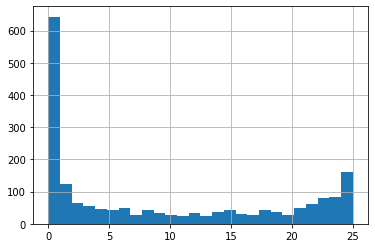

cons_zeros


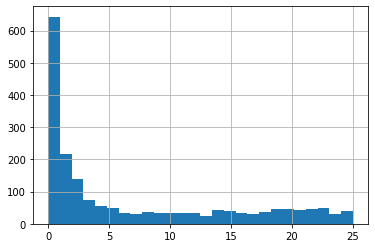

begin_zeros


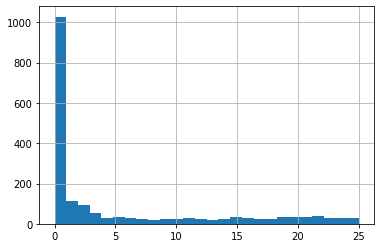

end_zeros


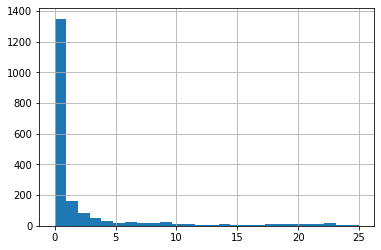

total_transactions


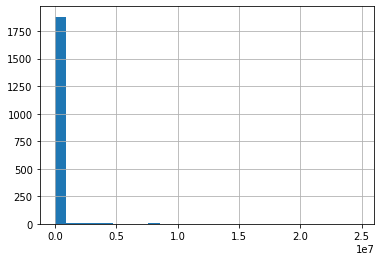

median


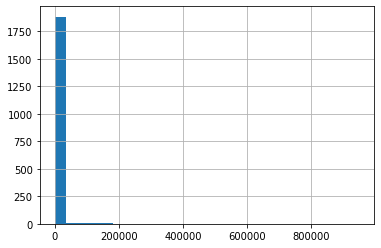

min


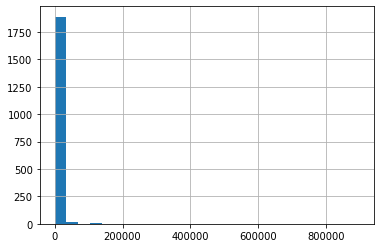

max


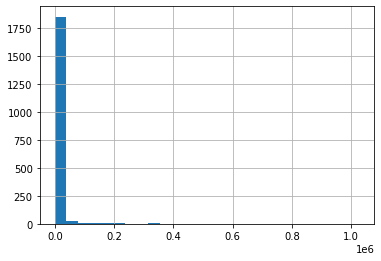

In [15]:
for i in data_features.columns:
  print(i)
  data_features[i].hist(bins=26)
  plt.show()

In [16]:
# merchants with at least 12 zeros

len(data_features[data_features['no_zero']>=12])

733

In [17]:
# merchants that begin with at least 12 zeros

len(data_features[data_features['begin_zeros']>=12])

409

In [18]:
# merchants that end with at least 12 zeros

len(data_features[data_features['end_zeros']>=12])

120

In [19]:
# merchant with at least 12 consecutive zeros

len(data_features[data_features['cons_zeros']>=12])

540

## DF ordered

In [20]:
# sorting full dataset (features included) by total transactions

data_ordered = data.sort_values(by='total_transactions', ascending = False).copy(deep=True)
data_ordered.head()

,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,2022-08-31 00:00:00,2022-09-30 00:00:00,no_zero,cons_zeros,begin_zeros,end_zeros,total_transactions,median,min,max
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 439,913338.0,898677.0,916564.0,906939.0,926654.0,916773.0,938441.0,926510.0,936356.0,927353.0,...,1021229.0,1027107.0,0,0,0,0,24790744.0,950438.5,898677.0,1027107.0
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,667523.0,668189.0,0,0,0,0,14613142.0,576954.0,395324.0,700144.0
Merchant 425,261996.0,407650.0,135635.0,256481.0,318097.0,284642.0,275557.0,310742.0,296407.0,300685.0,...,352725.0,520571.0,0,0,0,0,8577453.0,337202.0,135635.0,520571.0
Merchant 882,267630.0,270199.0,273342.0,277257.0,282835.0,286783.0,292687.0,295755.0,297007.0,303185.0,...,353725.0,358976.0,0,0,0,0,8189096.0,318959.0,267630.0,358976.0
Merchant 117,725597.0,47155.0,51614.0,40254.0,818112.0,58122.0,592594.0,217143.0,51444.0,55813.0,...,310221.0,307435.0,0,0,0,0,7821146.0,145316.5,31487.0,861216.0


In [21]:
# cumulative sum of total transactions

data_ordered['running_total']=data_ordered['total_transactions'].cumsum()

In [22]:
data_ordered[['total_transactions', 'running_total']].head()

,total_transactions,running_total
Merchant Name,,
Merchant 439,24790744.0,24790744.0
Merchant 1,14613142.0,39403886.0
Merchant 425,8577453.0,47981339.0
Merchant 882,8189096.0,56170435.0
Merchant 117,7821146.0,63991581.0


In [23]:
# overall total number of transactions for whole dataset

data_ordered['total_transactions'].sum()

181329865.0

In [24]:
# proof last cumulative row running_total

data_ordered['running_total'][-1:]

Merchant Name
Merchant 1052    181329865.0
Name: running_total, dtype: float64

In [25]:
# % of cumulative / total number of transactions

data_ordered['running/total']=data_ordered['running_total']/data_ordered['total_transactions'].sum()

In [26]:
data_ordered.head()

,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,...,no_zero,cons_zeros,begin_zeros,end_zeros,total_transactions,median,min,max,running_total,running/total
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 439,913338.0,898677.0,916564.0,906939.0,926654.0,916773.0,938441.0,926510.0,936356.0,927353.0,...,0,0,0,0,24790744.0,950438.5,898677.0,1027107.0,24790744.0,0.136716
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,0,0,0,0,14613142.0,576954.0,395324.0,700144.0,39403886.0,0.217305
Merchant 425,261996.0,407650.0,135635.0,256481.0,318097.0,284642.0,275557.0,310742.0,296407.0,300685.0,...,0,0,0,0,8577453.0,337202.0,135635.0,520571.0,47981339.0,0.264608
Merchant 882,267630.0,270199.0,273342.0,277257.0,282835.0,286783.0,292687.0,295755.0,297007.0,303185.0,...,0,0,0,0,8189096.0,318959.0,267630.0,358976.0,56170435.0,0.309769
Merchant 117,725597.0,47155.0,51614.0,40254.0,818112.0,58122.0,592594.0,217143.0,51444.0,55813.0,...,0,0,0,0,7821146.0,145316.5,31487.0,861216.0,63991581.0,0.352901


### 90% of transactions

In [27]:
data_ordered['running/total'][74]

0.9016487383366221

In [28]:
ninety = data_ordered.head(74).drop(columns=['no_zero','cons_zeros','begin_zeros','end_zeros','total_transactions','median','min','max','running_total','running/total'])

In [29]:
#ninety.to_csv('/content/drive/MyDrive/07 - Six - Team only/Processed data/ninety.csv')

(74, 26)


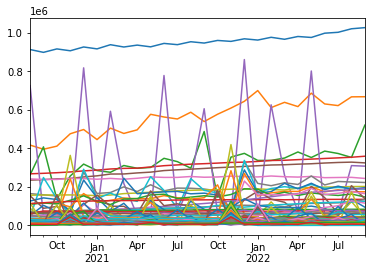

In [30]:
print(ninety.shape)
for merchant in ninety.index:
  ninety.loc[merchant].plot()

### 95% of transactions

In [31]:
data_ordered['running/total'][147]

0.9504272393298258

In [32]:
ninetyfive = data_ordered.head(147).drop(columns=['no_zero','cons_zeros','begin_zeros','end_zeros','total_transactions','median','min','max','running_total','running/total'])

In [33]:
#ninetyfive.to_csv('/content/drive/MyDrive/07 - Six - Team only/Processed data/ninetyfive.csv')

(147, 26)


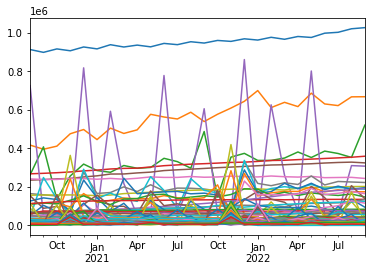

In [34]:
print(ninetyfive.shape)
for merchant in ninety.index:
  ninetyfive.loc[merchant].plot()

### 99% of transactions

In [35]:
data_ordered['running/total'][446]

0.9900502600605807

In [36]:
ninetynine = data_ordered.head(447).drop(columns=['no_zero','cons_zeros','begin_zeros','end_zeros','total_transactions','median','min','max','running_total','running/total'])

In [37]:
#ninetynine.to_csv('/content/drive/MyDrive/07 - Six - Team only/Processed data/ninetynine.csv')

(447, 26)


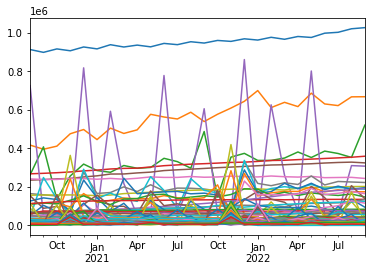

In [38]:
print(ninetynine.shape)
for merchant in ninety.index:
  ninetynine.loc[merchant].plot()